# Programming Project 1 analysis using EDA tools

### Import Modules

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Load the dataset and save it to a dataframe named 'df'
df=pd.read_csv('IndividualProject1 DS160 LMR.csv')
df.head()

,initials,date,course_id,time(m),summary
0,LR,1/9/2023,DS-160,5,Finishing up the work in excel from today's le...
1,LR,1/9/2023,FINA-315,15,Trying to set up ebook login and cengage accou...
2,LR,1/10/2023,BUSA-410,15,Read the chapter for the class discussion befo...
3,LR,1/10/2023,MKTG-310,10,Read the chapter for the class discussion befo...
4,LR,1/11/2023,DS-160,15,Finishing work on in class assignment 1


### Investigate your dataset using pandas modules and do the tasks. At the end the dataframe will be look like: 
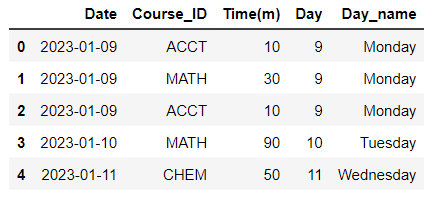

In [3]:
df.head()

,initials,date,course_id,time(m),summary
0,LR,1/9/2023,DS-160,5,Finishing up the work in excel from today's le...
1,LR,1/9/2023,FINA-315,15,Trying to set up ebook login and cengage accou...
2,LR,1/10/2023,BUSA-410,15,Read the chapter for the class discussion befo...
3,LR,1/10/2023,MKTG-310,10,Read the chapter for the class discussion befo...
4,LR,1/11/2023,DS-160,15,Finishing work on in class assignment 1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   initials   54 non-null     object
 1   date       54 non-null     object
 2   course_id  54 non-null     object
 3   time(m)    54 non-null     int64 
 4   summary    54 non-null     object
dtypes: int64(1), object(4)
memory usage: 2.2+ KB


In [5]:
df.tail()

,initials,date,course_id,time(m),summary
49,LR,2/9/2023,BUSA-346,10,Look over example before class
50,LR,2/9/2023,MKTG-310,10,Conduct first two interviews for assignment
51,LR,2/10/2023,DS-160,15,Finish practice notebook from class and submit...
52,LR,2/12/2023,MKTG-310,40,Collaborate with partner for assignment 1 and ...
53,LR,2/13/2023,DS-160,2,Update and commit changes to IP1 on Github


In [6]:
df.columns

Index(['initials', 'date', 'course_id', 'time(m)', 'summary'], dtype='object')

#### Is there any column you want to drop? If yes which column and why?

##### Yes. I would drop columns 'initals' and 'summary.' I would drop initials because all entries in the dataframe were made by me so it does not feel necessary to keep the column. I would drop summary because some are very detailed and contain a lot of information while others are very breif and it does not add much to the overall analysis.

In [7]:
df.drop(['initials', 'summary'], axis=1, inplace=True)

In [8]:
df.head()

,date,course_id,time(m)
0,1/9/2023,DS-160,5
1,1/9/2023,FINA-315,15
2,1/10/2023,BUSA-410,15
3,1/10/2023,MKTG-310,10
4,1/11/2023,DS-160,15


In [9]:
# Convert the date column to datetime
df['date']=pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       54 non-null     datetime64[ns]
 1   course_id  54 non-null     object        
 2   time(m)    54 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.4+ KB


In [10]:
# Calculate the day of the month and create a new column named 'Day'
df['Day']=df['date'].dt.day
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       54 non-null     datetime64[ns]
 1   course_id  54 non-null     object        
 2   time(m)    54 non-null     int64         
 3   Day        54 non-null     int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 1.8+ KB


In [11]:
# Create a new column called Day_name using  .dt.day_name()
df['Day_name']=df['date'].dt.day_name()
df.head()

,date,course_id,time(m),Day,Day_name
0,2023-01-09,DS-160,5,9,Monday
1,2023-01-09,FINA-315,15,9,Monday
2,2023-01-10,BUSA-410,15,10,Tuesday
3,2023-01-10,MKTG-310,10,10,Tuesday
4,2023-01-11,DS-160,15,11,Wednesday


### Answer the questions

In [12]:
# What is the average time you have spend for learning?
df.describe()

,time(m),Day
count,54.000000,54.000000
mean,21.740741,14.907407
std,28.903995,8.889826
min,2.000000,1.000000
25%,10.000000,7.250000
50%,10.000000,12.500000
75%,18.750000,22.750000
max,180.000000,31.000000


#### The average time I spent learning outside of class was approximately 21.74 minutes.

In [13]:
# Display all of the entries where you have spent more than the average time to learn 
df.loc[(df['time(m)']>21.74)]

,date,course_id,time(m),Day,Day_name
5,2023-01-11,BUSA-346,30,11,Wednesday
9,2023-01-15,FINA-315,60,15,Sunday
12,2023-01-18,MKTG-310,25,18,Wednesday
17,2023-01-22,BUSA-346,30,22,Sunday
20,2023-01-23,DS-160,60,23,Monday
29,2023-01-29,FINA-315,180,29,Sunday
31,2023-01-30,DS-160,45,30,Monday
34,2023-02-01,FINA-315,30,1,Wednesday
38,2023-02-05,BUSA-346,65,5,Sunday
39,2023-02-05,FINA-315,90,5,Sunday


In [14]:
# Which course you have spent the maximum time to prepare?
df.groupby('course_id').sum()

,time(m),Day
course_id,,
BUSA-346,210,183
BUSA-410,35,53
DS-160,181,219
FINA-315,475,121
MKTG-310,128,124
MKTG-320,145,105


#### I spent the most time preparing for FINA-315

In [15]:
# Which day of the week you spent most of the time?
mosttime=df['Day_name'].mode()[0]
mosttime

'Monday'

#### I spent most of the time studying and working on work outside of class on Mondays

### Investigate the distribution of Time, adding the mean. How the data distributed?
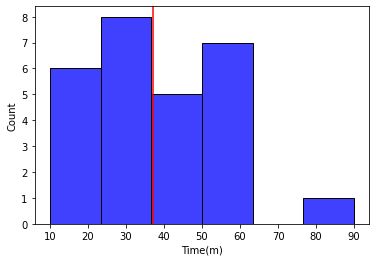

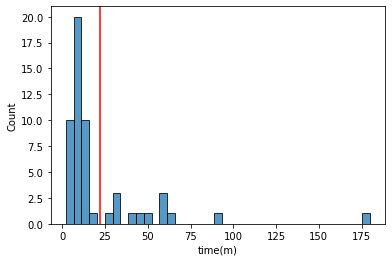

In [16]:
hist_plot=sns.histplot(x='time(m)', data=df)
# Calculating the mean
mean=df['time(m)'].mean()
#ploting the mean
plt.axvline(mean, color='red')
plt.show()

#### The data is very heavily positively (right) skewed. Most of the data is shown on the left side of the x axis, as well as distributed to the left of the mean value on the histogram. Generally speaking, the data is distributed more commonly between 0 and 20 minutes.

### Investigate Total time by Day using bar plot - Remove the Confidence Interval - By Course ID. Comment on your findings
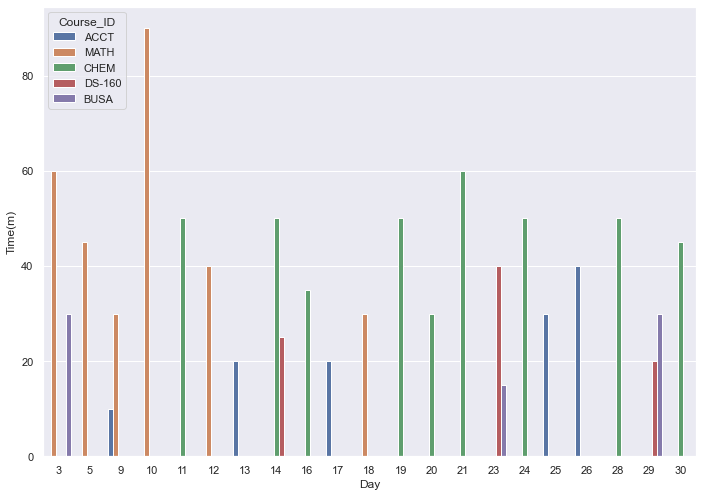

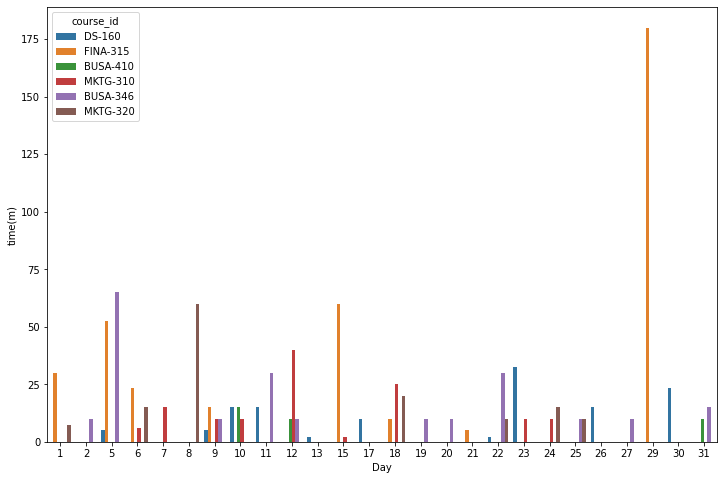

In [17]:
fig=plt.figure(figsize=(12,8))
barplot=sns.barplot(x='Day', y='time(m)', data=df,
                    ci=False, hue='course_id')

#### There are multiple days that I worked on multiple courses on the same day as shown by multiple bar lines corresponding to particular xticks for Days. It looks as though I spent the most time on coursework following a pattern of working most Saturday through Mondays which can be seen by those three corresponding numerical day values being more clustered together and the ticks being more frequent through the chart 

#### On the days that I did spend time working on multiple courses, I spent around the same working on those subjects throughout the day.

### Investigate the measure of dispersion (table and plot) of time column.
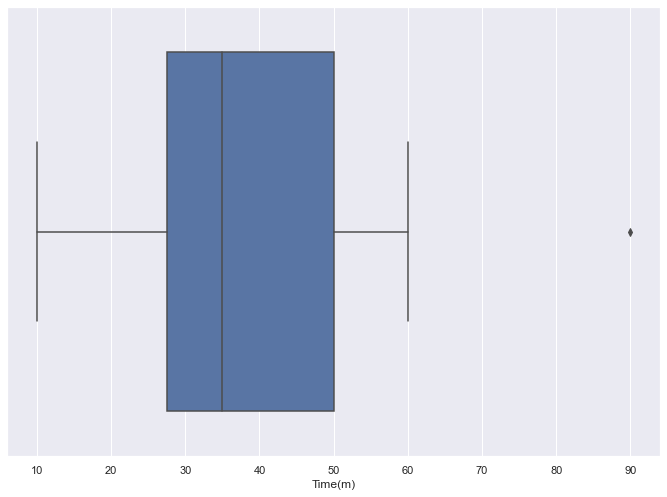

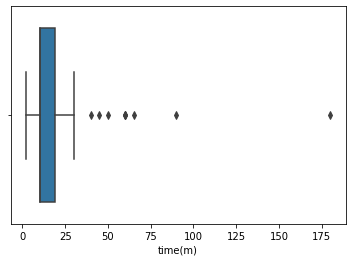

In [18]:
bp=sns.boxplot(x='time(m)', data=df)
plt.xlabel('time(m)')
plt.show()

In [19]:
time=df['time(m)']
time.head()

0     5
1    15
2    15
3    10
4    15
Name: time(m), dtype: int64

In [20]:
time.describe()

count     54.000000
mean      21.740741
std       28.903995
min        2.000000
25%       10.000000
50%       10.000000
75%       18.750000
max      180.000000
Name: time(m), dtype: float64

#### The range of time values is from 2 minutes to 180 minutes. Most of the data falls the range of 2 to 30-35 minutes, with 7 values extending beyond the whiskers of the plot. These are outliers in the data. It is interesting that the value for Q1 is the same value as Q2 which is the median. The mean value being greater than the median value helps prove the data is right skewed.

### Investigate the the distribution of time by Day_name
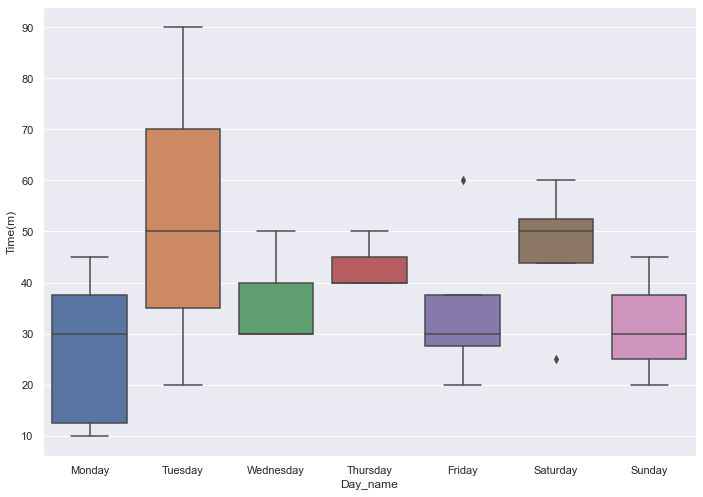

In [21]:
df.head()

,date,course_id,time(m),Day,Day_name
0,2023-01-09,DS-160,5,9,Monday
1,2023-01-09,FINA-315,15,9,Monday
2,2023-01-10,BUSA-410,15,10,Tuesday
3,2023-01-10,MKTG-310,10,10,Tuesday
4,2023-01-11,DS-160,15,11,Wednesday


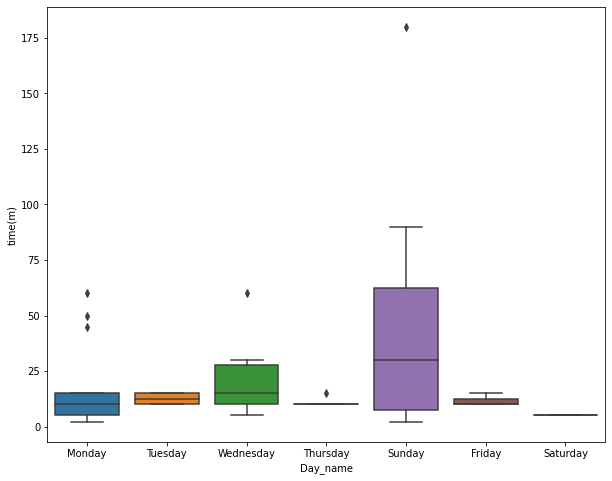

In [22]:
fig=plt.figure(figsize=(10,8))
box_plot=sns.boxplot(x='Day_name', y='time(m)', data=df)

#### Most work outside of class was completed on Sundays, followed by Mondays and Wednesdays. Thursdays and Saturdays appeared very rarely but had consistent time spent. Sundays have the largest spread of time spent working.

### Use lmplots to plot Day and Time , remove error bar, add hue and display by column
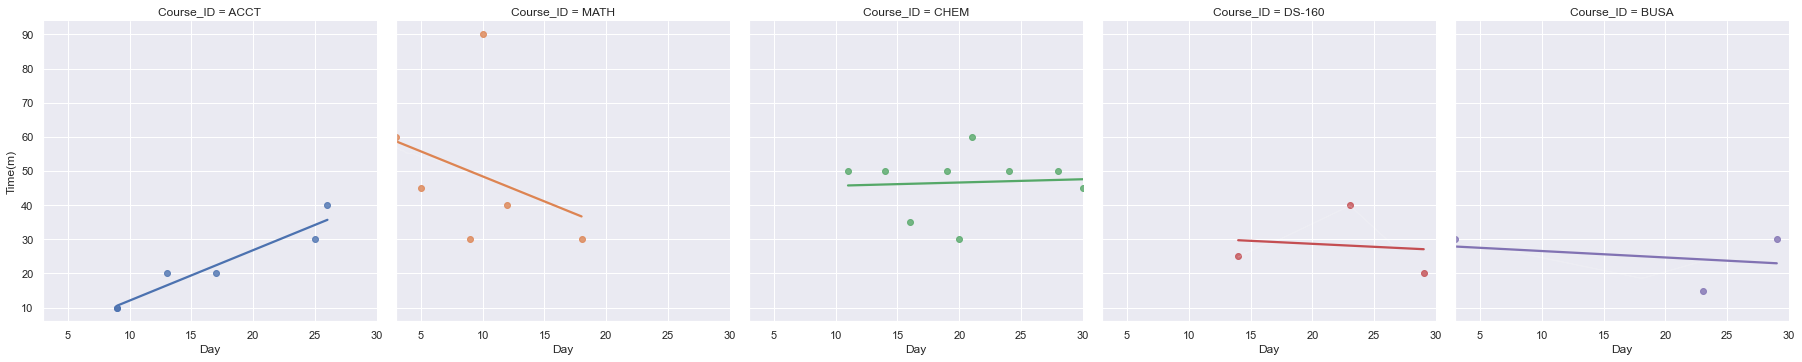

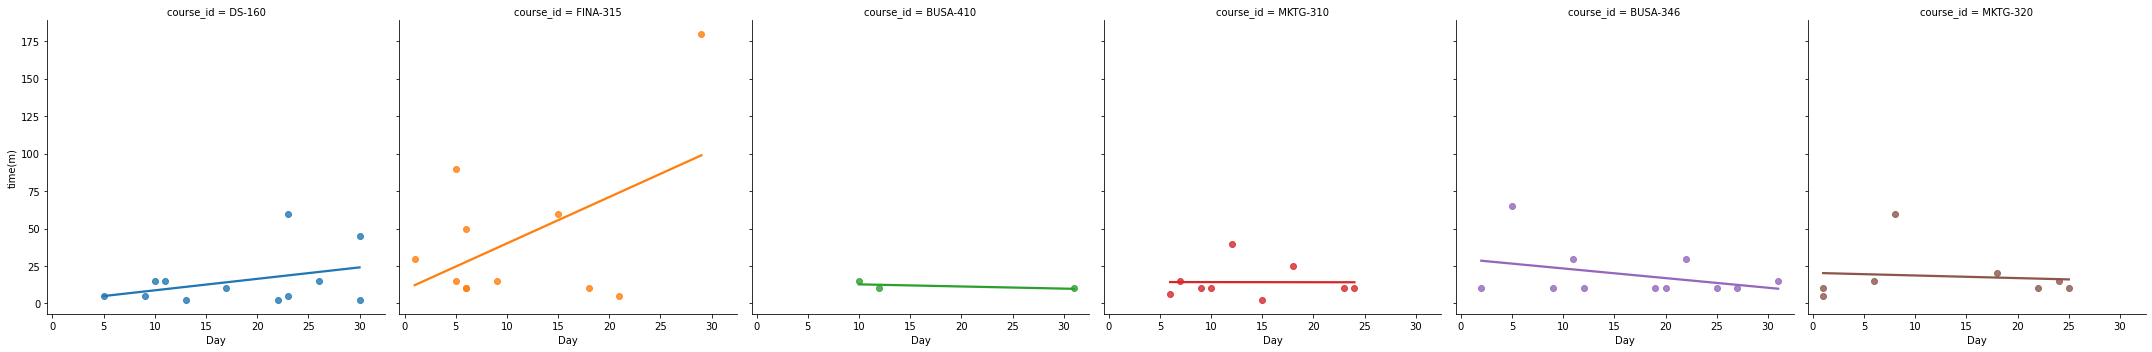

In [23]:
lm_plot=sns.lmplot(x='Day', y='time(m)',
                  data=df, ci=False,
                  hue='course_id', col='course_id')

### Create a pair plot of Day and Time and add course id as hue
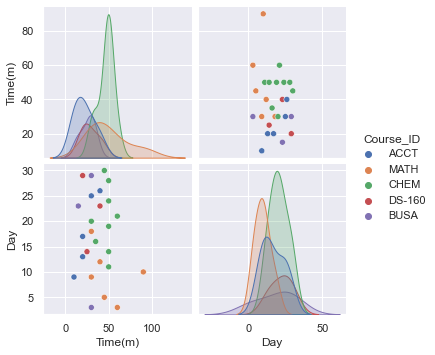

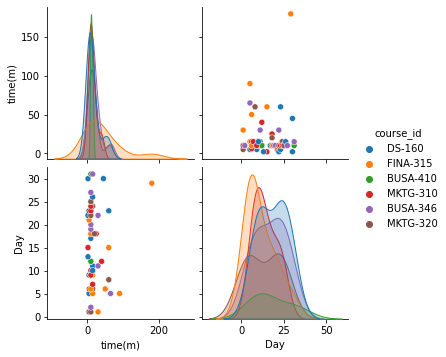

In [24]:
pairplot=sns.pairplot(df,hue='course_id')

### Display the Heatmap and comment on your findings
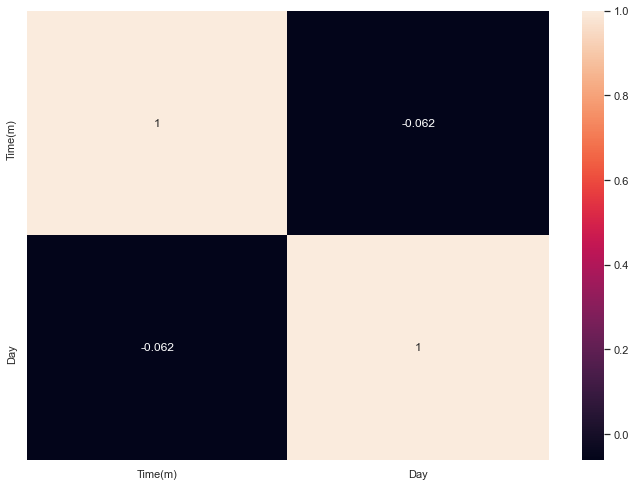

          time(m)       Day
time(m)  1.000000  0.071205
Day      0.071205  1.000000


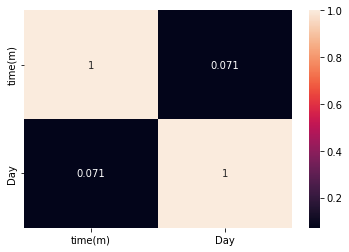

In [25]:
heat_map_corr=df[['time(m)','Day']].corr(method='pearson')
print(heat_map_corr)

cols=['time(m)', 'Day']
heat_map=sns.heatmap(heat_map_corr, annot=True,
                    xticklabels=cols,
                    yticklabels=cols)

#### The pearson correlation between time(m) and Day is approximately 0.071, meaning that there is very little correlation between time spent working on things for school outside of class and the specific day of the month.